In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("AIRPOL_data.csv", delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49140 entries, 0 to 49139
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       49140 non-null  object 
 1   NUTS_Code                     49140 non-null  object 
 2   Air_Pollutant                 49140 non-null  object 
 3   Outcome                       49140 non-null  object 
 4   Affected_Population           49140 non-null  object 
 5   Populated_Area[km2]           49140 non-null  object 
 6   Air_Pollution_Average[ug/m3]  49140 non-null  object 
 7   Value                         49140 non-null  object 
 8   Unnamed: 8                    0 non-null      float64
 9   Unnamed: 9                    0 non-null      float64
 10  Unnamed: 10                   0 non-null      float64
 11  Unnamed: 11                   0 non-null      float64
 12  Unnamed: 12                   0 non-null      float64
 13  U

In [54]:
toDrop = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
          'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
          'Unnamed: 14', 'Unnamed: 15']

df.drop(columns=toDrop, axis=1, inplace = True)

print(f"Shape before deleting duplicates {df.shape}")
df = df.drop_duplicates()
print(f"Shape after deleting duplicates {df.shape}")

df.describe()

Shape before deleting duplicates (49140, 8)
Shape after deleting duplicates (45540, 8)


,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
count,45540,45540,45540,45540,45540,45540,45540,45540
unique,42,1755,3,6,4863,1789,570,2711
top,Germany,DEG0N,PM2.5,Diabetes Mellitus,"902504,00","6066,60","8,50","0,00"
freq,12512,29,27456,9866,92,112,956,4717


In [55]:
predictors= ['Country', 'NUTS_Code', 'Air_Pollutant', 'Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]']
print(predictors)

['Country', 'NUTS_Code', 'Air_Pollutant', 'Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]']


#### String to float conversion

In [56]:
numeric_columns = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

#### Univariate Analysis for numerical variables

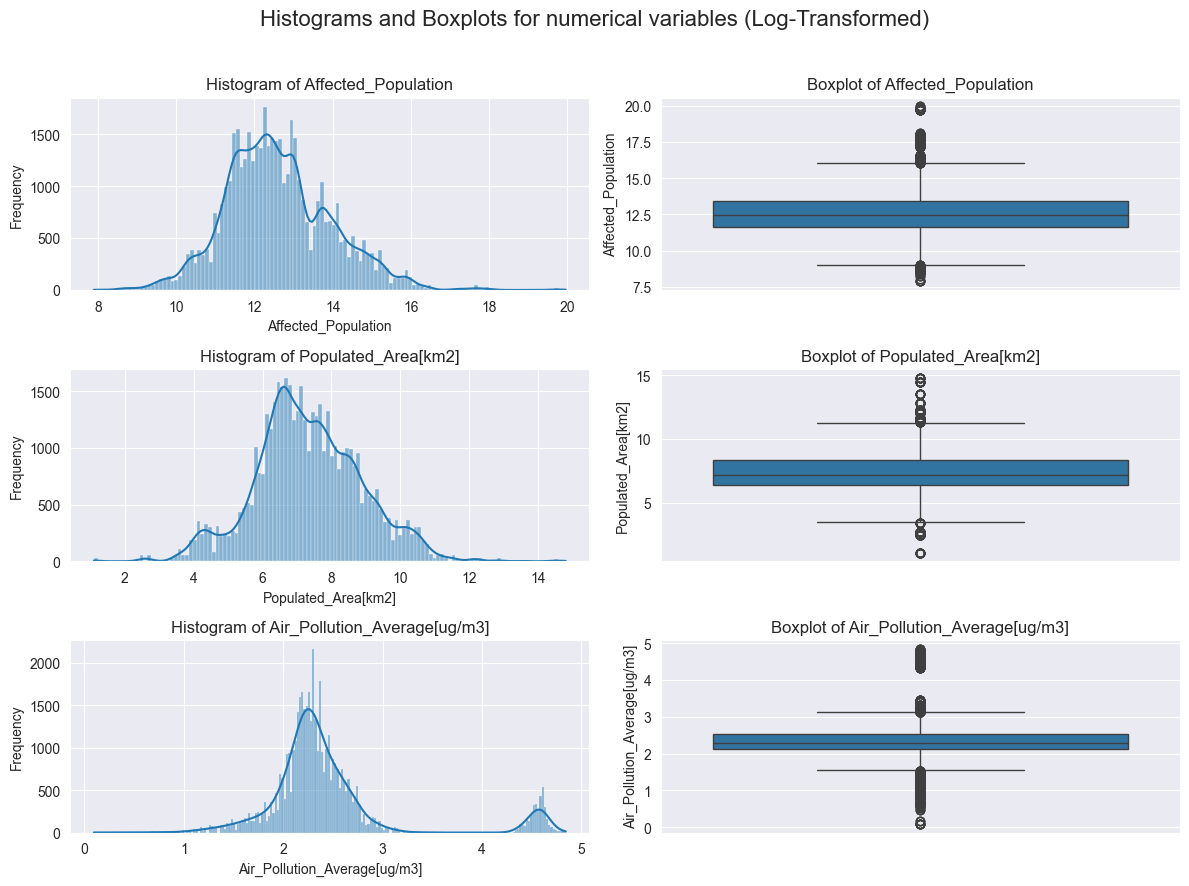

In [57]:
df_log = df.copy()

for col in numeric_columns:
    df_log[col] = np.log1p(df_log[col])

fig, axe = plt.subplots(nrows = len(numeric_columns), ncols = 2, figsize = (12, 3*len(numeric_columns)))
fig.suptitle('Histograms and Boxplots for numerical variables (Log-Transformed)', fontsize=16)
for i, column in enumerate(numeric_columns):
    sns.histplot(df_log[column], ax=axe[i, 0], kde=True)
    axe[i, 0].set_title(f"Histogram of {column}")
    axe[i, 0].set_xlabel(column)
    axe[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=df_log[column], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {column}")
    axe[i, 1].set_ylabel(column)


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### Univariate Analysis for discrete variables and its relation with numerical variables 

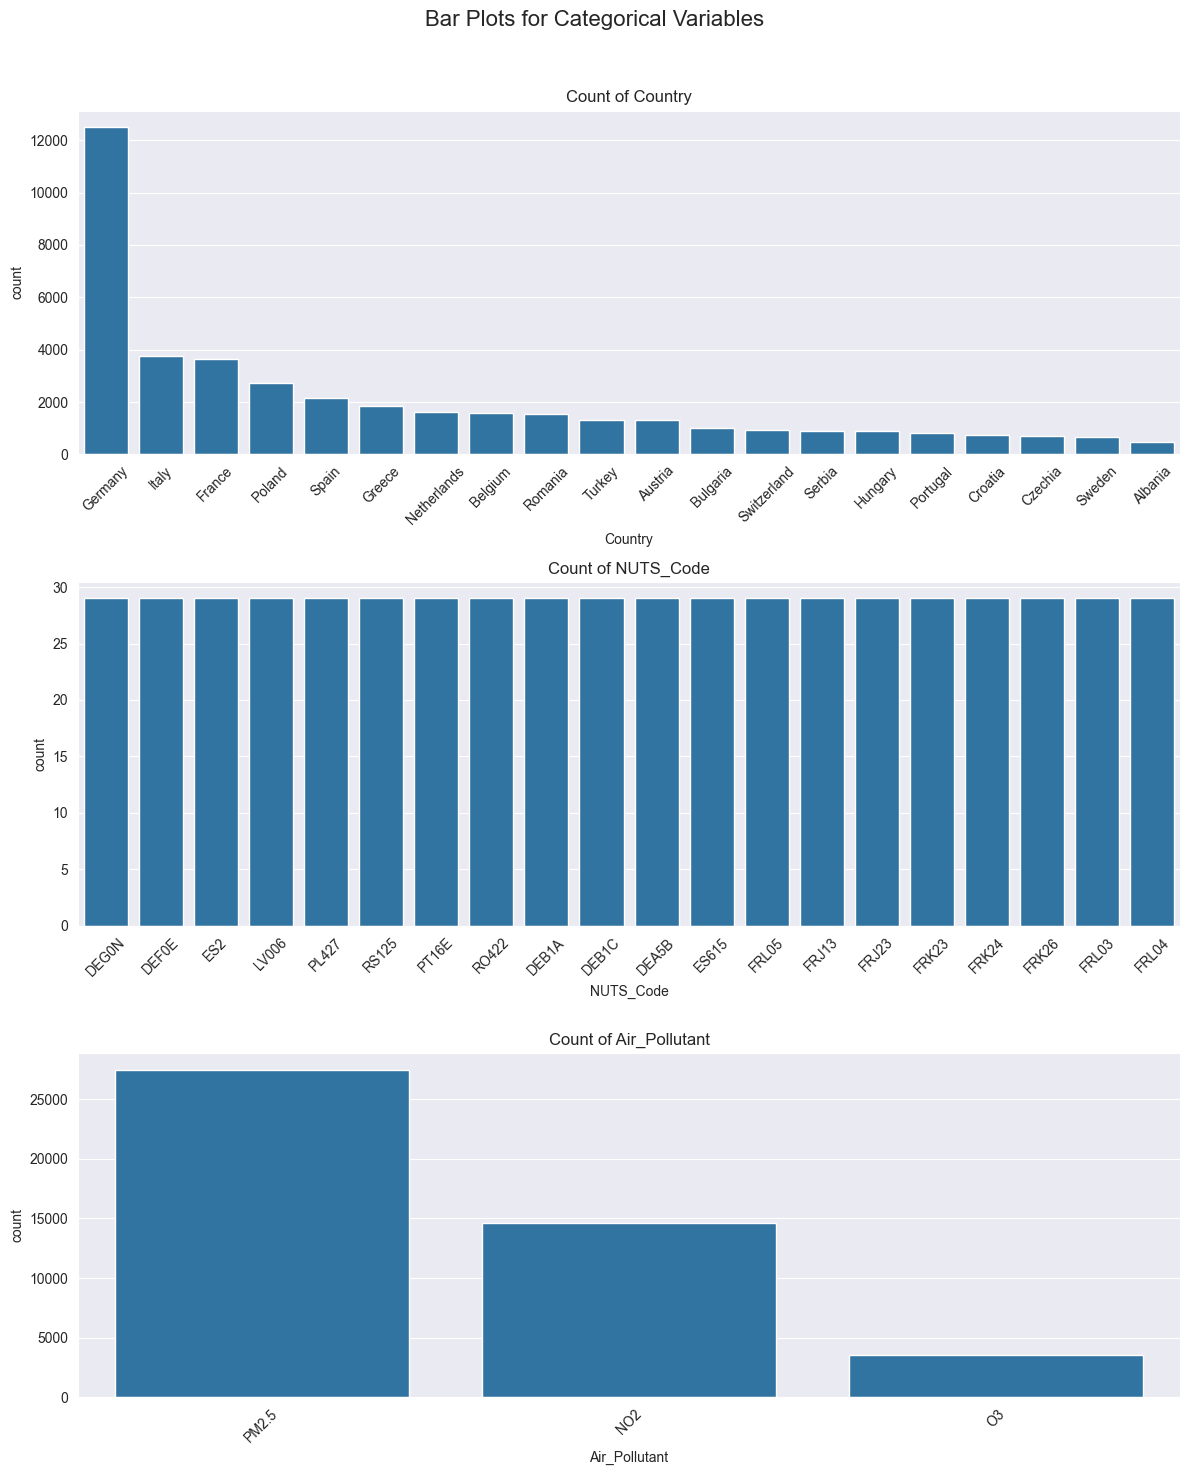

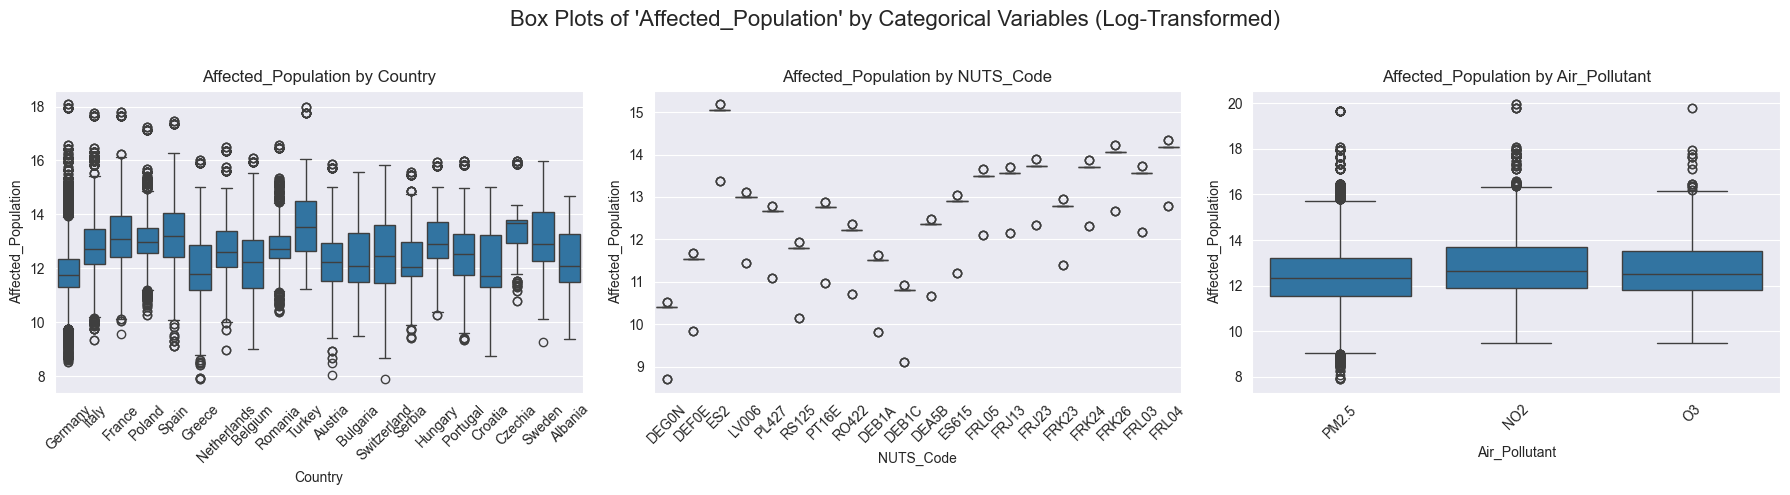

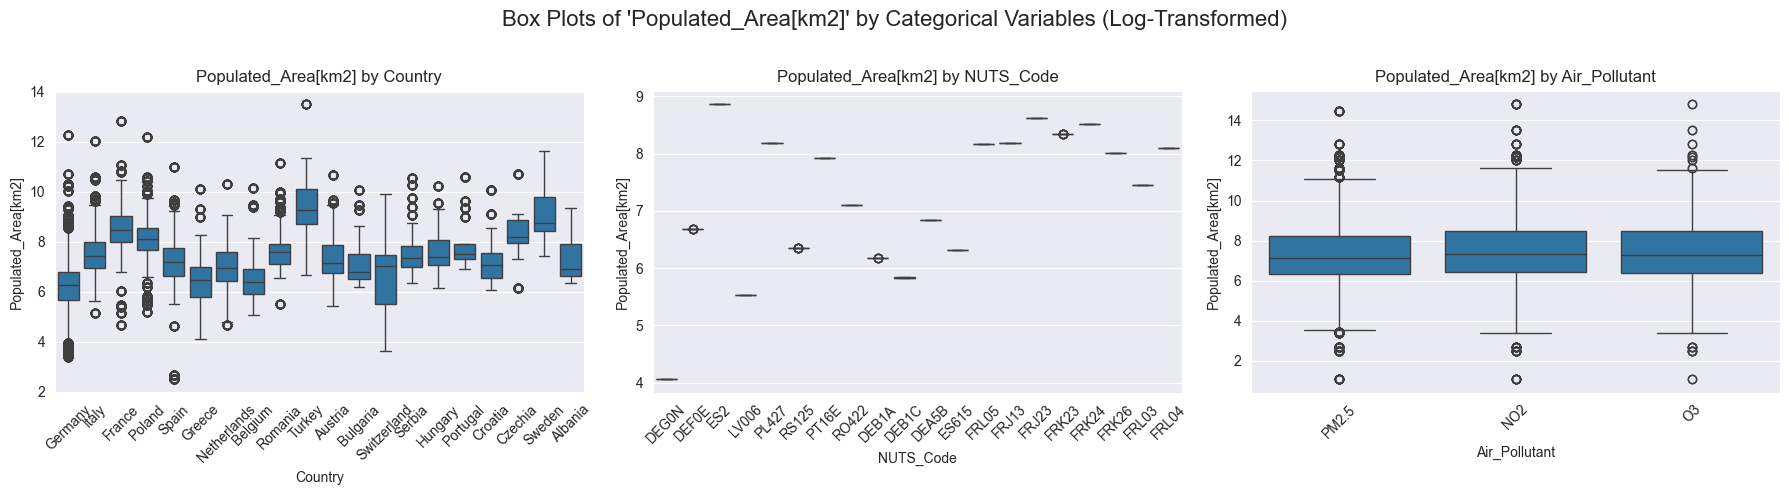

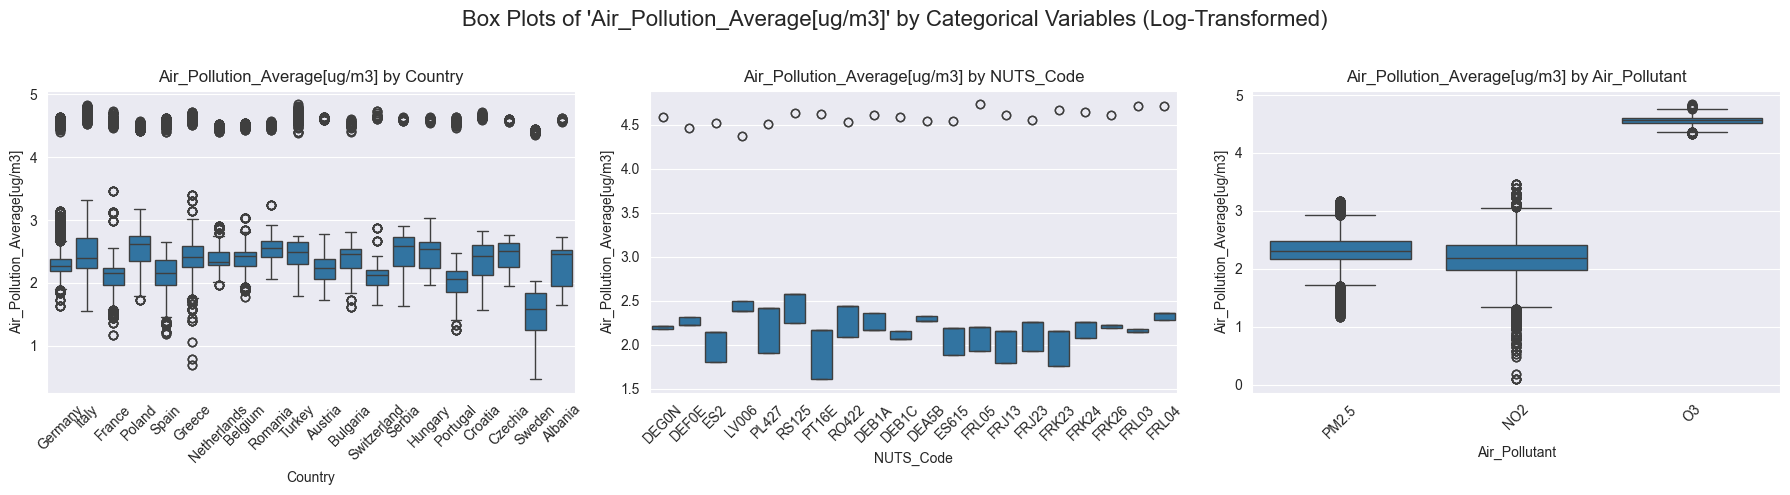

In [58]:
discrete_columns = ['Country', 'NUTS_Code', 'Air_Pollutant']

fig, axes = plt.subplots(len(discrete_columns), 1, figsize=(12, 5 * len(discrete_columns)))
fig.suptitle("Bar Plots for Categorical Variables", fontsize=16)

for i, col in enumerate(discrete_columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])  # top 20
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plots of a numeric value grouped by categories
for value in numeric_columns:

    fig, axes = plt.subplots(nrows=1, ncols=len(discrete_columns), figsize=(6 * len(discrete_columns), 5))
    fig.suptitle(f"Box Plots of '{value}' by Categorical Variables (Log-Transformed)", fontsize=16)

    for i, col in enumerate(discrete_columns):
        sns.boxplot(data=df_log, x=col, y=value, ax=axes[i], order=df_log[col].value_counts().index[:20])
        axes[i].set_title(f"{value} by {col}")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

#### Analysis of goal attributes

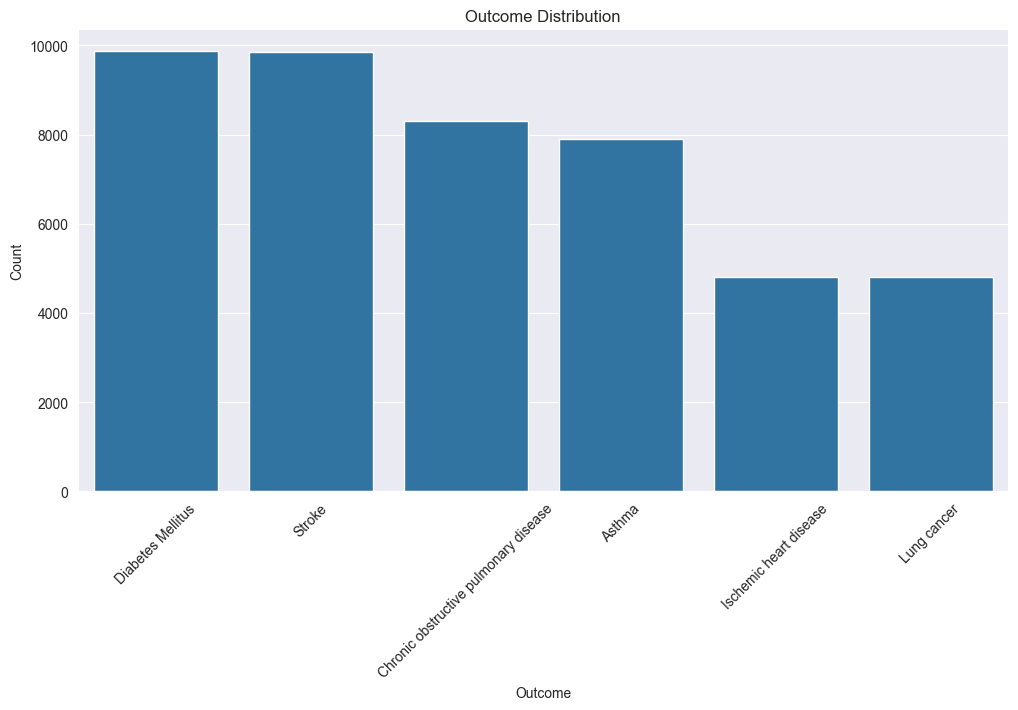

In [59]:
#Outcome
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Outcome', order=df['Outcome'].value_counts().index)
plt.title("Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

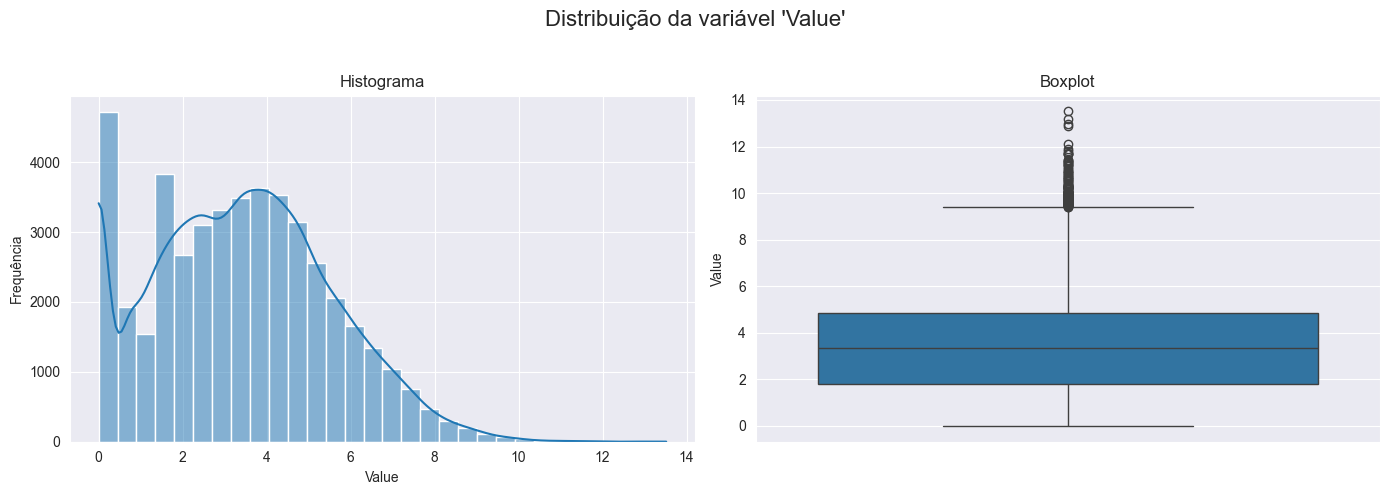

In [60]:
df_log['Value'] = df_log['Value'].str.replace(',', '.', regex=False).astype(float)
df_log['Value'] = np.log1p(df_log['Value'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.suptitle("Distribuição da variável 'Value'", fontsize=16)

# Histograma
sns.histplot(df_log['Value'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histograma")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequência")

# Boxplot com escala logarítmica
sns.boxplot(y=df_log['Value'], ax=axes[1])
axes[1].set_title("Boxplot")
axes[1].set_ylabel("Value")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Bivariate Analysis

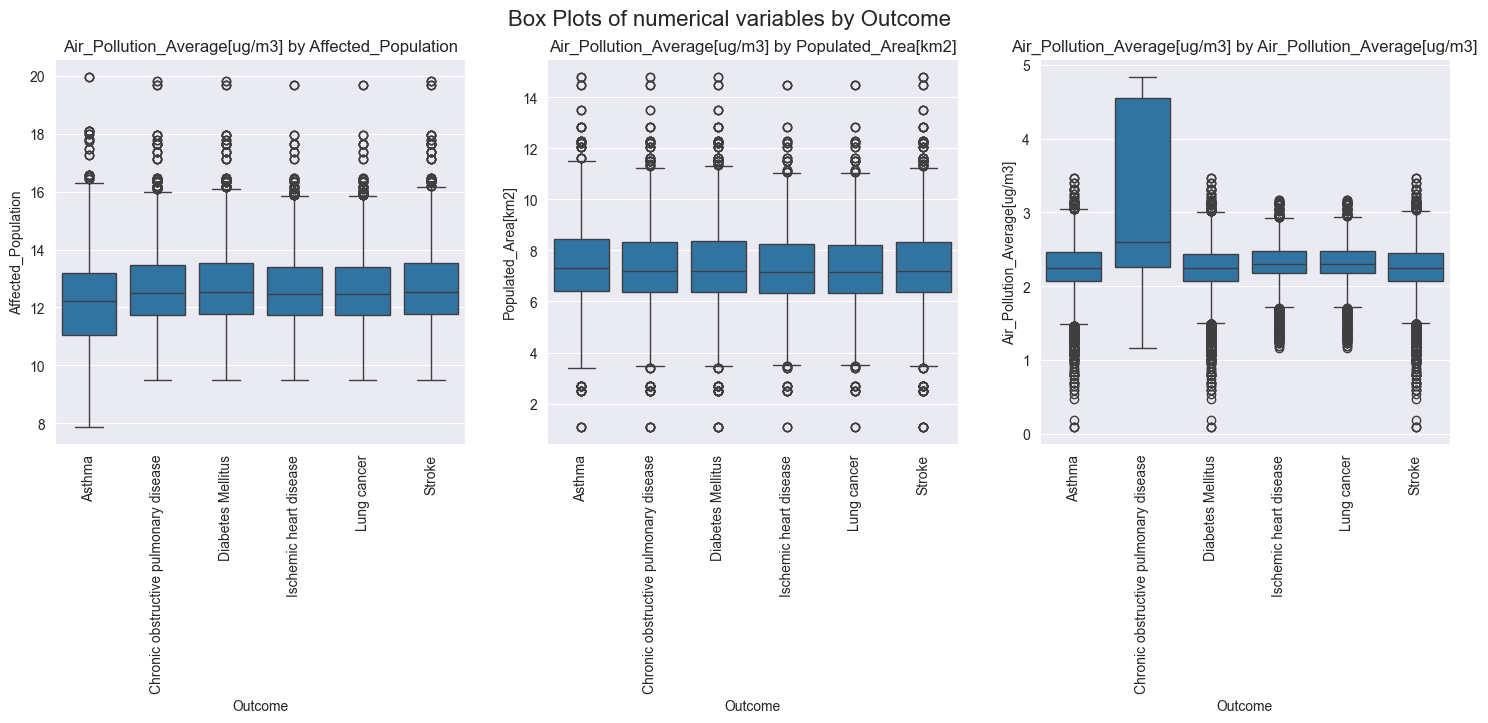

In [61]:
#numerical variables by outcome
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(6 * len(numeric_columns), 5))
fig.suptitle(f"Box Plots of numerical variables by Outcome", fontsize=16)

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df_log, x='Outcome', y=col, ax=axes[i])
    axes[i].set_title(f"{value} by {col}")
    axes[i].tick_params(axis='x', rotation=90)

plt.show()


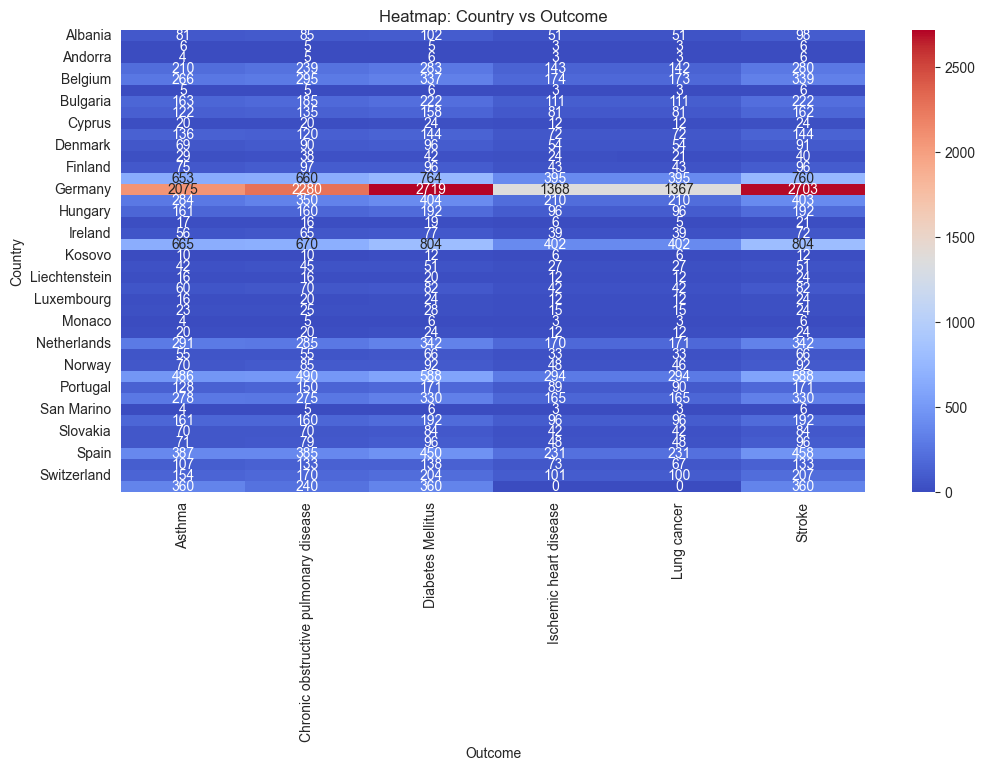

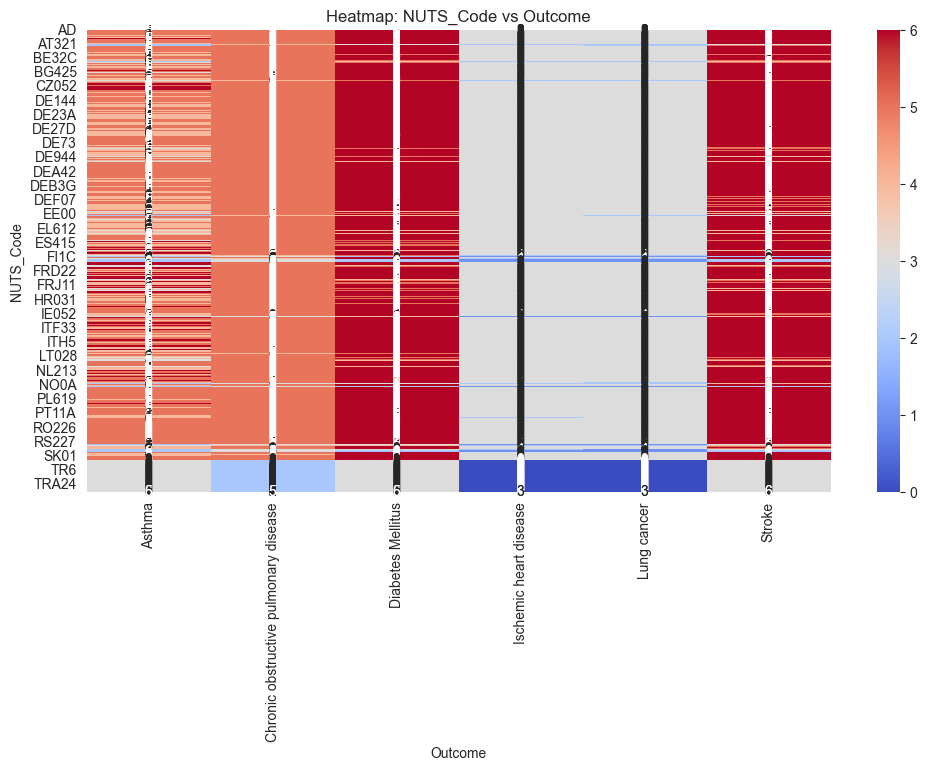

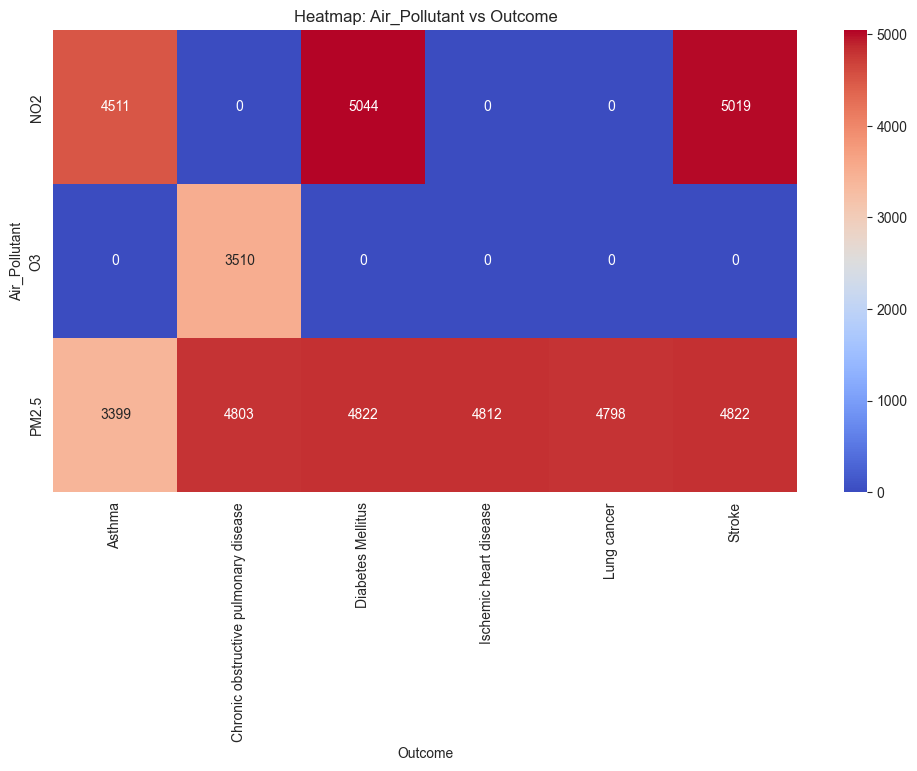

In [62]:
for col in discrete_columns:

    ct = pd.crosstab(df[col], df['Outcome'])

    # Plotar heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"Heatmap: {col} vs Outcome")
    plt.xlabel("Outcome")
    plt.ylabel(col)
plt.show()

In [63]:
# Dicionário de mapeamento de países para regiões
country_region_map = {
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Switzerland': 'Western Europe',
    
    'Poland': 'Eastern Europe',
    'Czechia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    
    'Greece': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Portugal': 'Southern Europe',
    
    'Sweden': 'Northern Europe',
    'Denmark': 'Northern Europe',
    'Finland': 'Northern Europe',
}

df['Region'] = df['Country'].map(country_region_map)